<a href="https://colab.research.google.com/github/mikeffendii/Amazon-Stock-Prediction/blob/main/Amazon%20Stock%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon (AMZN) Stock Price prediction using Facebook Prophet 

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization

In [3]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [4]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [5]:
df = pd.read_csv("AMZN.csv")

In [6]:
#read_csv function from pandas

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-11,161.500000,166.350006,160.701508,165.362000,165.362000,62806000
1,2022-01-12,166.574997,166.878006,164.417007,165.207001,165.207001,50030000
2,2022-01-13,165.250504,166.221497,161.091003,161.214005,161.214005,52188000
3,2022-01-14,160.149994,162.250000,159.800507,162.138000,162.138000,45974000
4,2022-01-18,159.104996,159.734497,157.664505,158.917496,158.917496,67292000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,124.416303,126.525373,122.038851,124.217594,124.217594,7.625863e+07
std,23.889638,24.069048,23.645956,23.868255,23.868255,3.393351e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,107.514999,110.468250,105.179749,107.478500,107.478500,5.544485e+07
50%,122.010002,123.639999,119.182999,121.180000,121.180000,6.707510e+07
75%,144.386498,146.395752,141.250000,144.447006,144.447006,8.498455e+07
max,170.384003,170.831497,167.868500,169.315002,169.315002,2.726620e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
px.area(df, x="Date", y="Close")

In [12]:
px.line(df, x="Date", y="Close")

In [13]:
px.area(df, x="Date", y="Volume")

In [14]:
px.bar(df, x="Date", y="Volume")

In [15]:
px.box(df, y="Close")

# Understanding Facebook Prophet

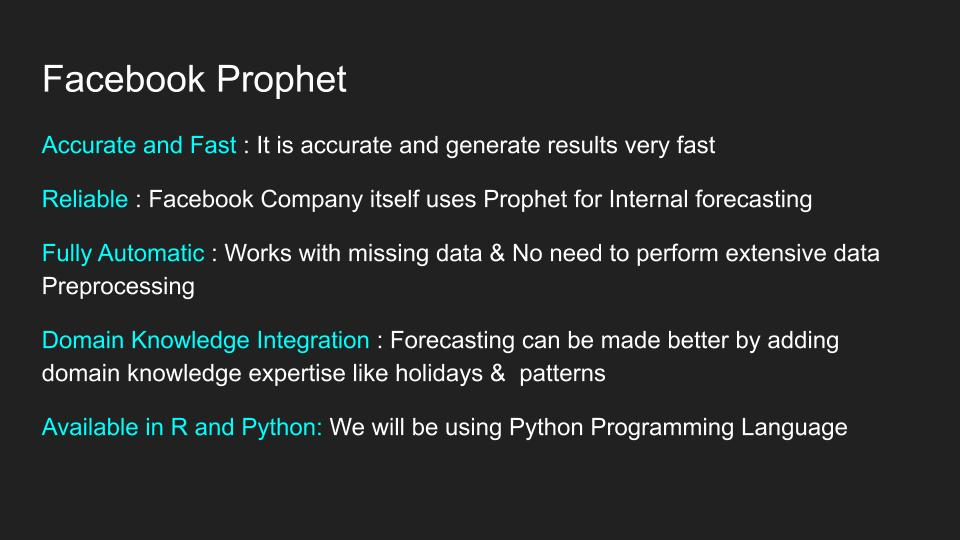

## Data Preperation

In [16]:
columns = ['Date', 'Close']
n_df = pd.DataFrame(df, columns = columns)
n_df.head()

,Date,Close
0,2022-01-11,165.362000
1,2022-01-12,165.207001
2,2022-01-13,161.214005
3,2022-01-14,162.138000
4,2022-01-18,158.917496


In [17]:
pro_df = n_df.rename(columns = {'Date': 'ds', 'Close': 'y'})
pro_df.head()

,ds,y
0,2022-01-11,165.362000
1,2022-01-12,165.207001
2,2022-01-13,161.214005
3,2022-01-14,162.138000
4,2022-01-18,158.917496


## Creating Facebook Prophet Model

In [18]:
model = Prophet()
model.fit(pro_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0vgizmzp/83fyzyk6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0vgizmzp/ei6dlq1_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60422', 'data', 'file=/tmp/tmp0vgizmzp/83fyzyk6.json', 'init=/tmp/tmp0vgizmzp/ei6dlq1_.json', 'output', 'file=/tmp/tmp0vgizmzp/prophet_model1hn9_j9q/prophet_model-20230111185349.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:53:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:53:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [19]:
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-11,158.237060,145.337065,168.739501,158.237060,158.237060,-1.177851,-1.177851,-1.177851,-1.177851,-1.177851,-1.177851,0.0,0.0,0.0,157.059209
1,2022-01-12,158.145314,145.491894,167.602311,158.145314,158.145314,-1.141513,-1.141513,-1.141513,-1.141513,-1.141513,-1.141513,0.0,0.0,0.0,157.003801
2,2022-01-13,158.053568,144.878010,168.380698,158.053568,158.053568,-1.391874,-1.391874,-1.391874,-1.391874,-1.391874,-1.391874,0.0,0.0,0.0,156.661694
3,2022-01-14,157.961822,144.473080,167.936802,157.961822,157.961822,-1.794239,-1.794239,-1.794239,-1.794239,-1.794239,-1.794239,0.0,0.0,0.0,156.167584
4,2022-01-18,157.594838,145.996943,168.679038,157.594838,157.594838,-1.177851,-1.177851,-1.177851,-1.177851,-1.177851,-1.177851,0.0,0.0,0.0,156.416987


##Forecasting

In [20]:
px.line(forecast, x='ds', y='yhat')

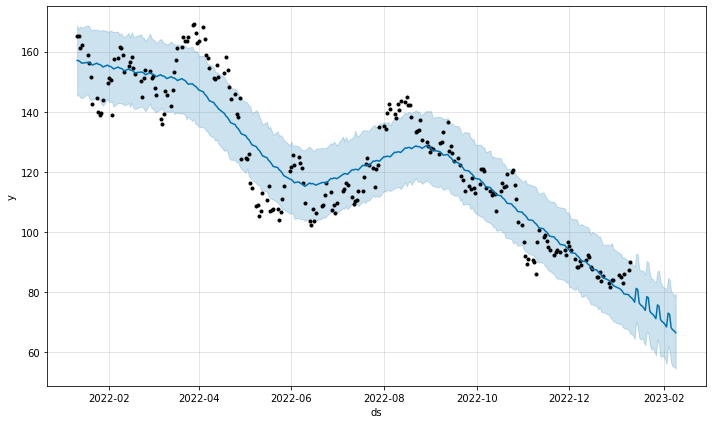

In [21]:
figure = model.plot(forecast, xlabel='ds', ylabel='y')

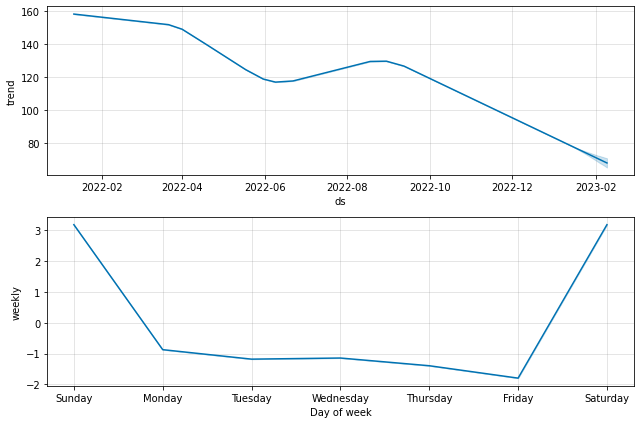

In [22]:
figure2 = model.plot_components(forecast)

##Downloading the Forecast data

In [24]:
from google.colab import files
forecast.to_csv("AMZN-Forecast.csv")
files.download("AMZN-Forecast.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>